In [2]:
#https://github.com/schlegelp/navis/issues/17
import sys
from unittest.mock import MagicMock

# Mock vispy and relevant submodules
sys.modules['vispy'] = MagicMock()
sys.modules['vispy.util'] = MagicMock()
sys.modules['vispy.gloo'] = MagicMock()
sys.modules['vispy.gloo.util'] = MagicMock()
sys.modules['vispy.util.transforms'] = MagicMock()
sys.modules['vispy.util.quaternion'] = MagicMock()
sys.modules['vispy.geometry'] = MagicMock()
sys.modules['vispy.visuals'] = MagicMock()
# Now you should be able to import navis
import navis
######

# Connectivity (anatomy-only) trends
import h5py
import pymaid
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as stats

import sys
sys.path.append('/Users/akuan/repos/ppc_project_analysis/tracing_analysis')
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
from scipy import stats as stats
import pandas as pd
import ppc_analysis_functions.figure_plotting as figs
import h5py
import seaborn as sns
figsDir = '/Users/akuan/Dropbox (HMS)/htem_team/projects/PPC_project/final_fig_panels_Final/ED_Fig2/'
workingDir = '/Users/akuan/Dropbox (HMS)/htem_team/projects/PPC_project/analysis_dataframes/'

type_pal = {'pyramidal': 'green', 'non pyramidal':'purple', 'unknown':'gray'}

In [93]:
# ED Fig. 2 - trial average neuron activity 
with open(workingDir+'MN_DF_new_PPC.pkl' , 'rb') as f:  
    MN_DF_PPC = pickle.load(f)
MN_DF_PPC.dropna(subset=['Ca_trial_mean_wL'], inplace=True)
pyr_MN_DF_PPC = MN_DF_PPC[MN_DF_PPC.type == 'pyramidal']
nonpyr_MN_DF_PPC = MN_DF_PPC[MN_DF_PPC.type == 'non pyramidal']
n = len(pyr_MN_DF_PPC)


wL = np.stack(pyr_MN_DF_PPC.Ca_trial_mean_wL.values)
bR = np.stack(pyr_MN_DF_PPC.Ca_trial_mean_bR.values)



left selective, ids 175865 to 190907
right selective, ids 144253 to 25998
non selective, ids 143342 to 198820


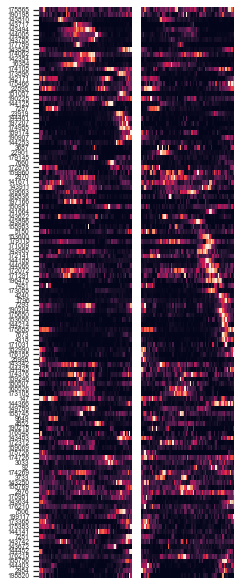

In [126]:
# Pyramidal
sns.set(rc={'figure.figsize':(3.5,10.5)}, font_scale=0.6, style='ticks')

for idx,row in pyr_MN_DF_PPC.iterrows():
    max_act = np.maximum(row['Ca_trial_mean_wL'].max(), row['Ca_trial_mean_bR'].max())
    pyr_MN_DF_PPC.at[idx,'Ca_trial_mean_wL'] =  pyr_MN_DF_PPC.loc[idx]['Ca_trial_mean_wL']/max_act
    pyr_MN_DF_PPC.at[idx,'Ca_trial_mean_bR'] =  pyr_MN_DF_PPC.loc[idx]['Ca_trial_mean_bR']/max_act
pyr_MN_DF_PPC.sort_values(by=['select_idx_MI'], inplace=True)

pyr_MN_left = pyr_MN_DF_PPC[pyr_MN_DF_PPC.select_idx_MI < -0.05]
pyr_MN_left.sort_values(by = ['choiceMI_max_idx'], inplace=True)
wL_l = np.stack(pyr_MN_left.Ca_trial_mean_wL.values)
bR_l = np.stack(pyr_MN_left.Ca_trial_mean_bR.values)
print("left selective, ids %i to %i" % (pyr_MN_left.skeleton_id.values[0], pyr_MN_left.skeleton_id.values[-1]))

pyr_MN_right = pyr_MN_DF_PPC[pyr_MN_DF_PPC.select_idx_MI > 0.05]
pyr_MN_right.sort_values(by = ['choiceMI_max_idx'], inplace=True)
wL_r = np.stack(pyr_MN_right.Ca_trial_mean_wL.values)
bR_r = np.stack(pyr_MN_right.Ca_trial_mean_bR.values)
print("right selective, ids %i to %i" % (pyr_MN_right.skeleton_id.values[0], pyr_MN_right.skeleton_id.values[-1]))


pyr_MN_non = pyr_MN_DF_PPC[np.abs(pyr_MN_DF_PPC.select_idx_MI) < 0.05]
pyr_MN_non.sort_values(by = ['choiceMI_max_idx'], inplace=True)
wL_non = np.stack(pyr_MN_non.Ca_trial_mean_wL.values)
bR_non = np.stack(pyr_MN_non.Ca_trial_mean_bR.values)

print("non selective, ids %i to %i" % (pyr_MN_non.skeleton_id.values[0], pyr_MN_non.skeleton_id.values[-1]))

wL_all = np.concatenate((wL_l, wL_r, wL_non))
bR_all = np.concatenate((bR_l, bR_r, bR_non))
ids_all = np.concatenate((pyr_MN_left.skeleton_id.values, pyr_MN_right.skeleton_id.values,pyr_MN_non.skeleton_id.values))
ids_all = [int(i) for i in ids_all]

plt.subplots_adjust(wspace=0.1, hspace = 0.5)

plt.subplot(1,2,1)
l = sns.heatmap(wL_all,cbar=False)
l.set_yticks(np.arange(len(ids_all))+0.5)
l.set_yticklabels(ids_all)
l.set_xticks([])

plt.subplot(1,2,2)
r = sns.heatmap(bR_all,cbar=False)
r.set_yticks([])
r.set_xticks([])
plt.savefig(figsDir+'pyr_activity_heatmap.pdf',bbox_inches='tight')

left selective, ids 26266 to 26266
right selective, ids 141681 to 7332
non selective, ids 24051 to 190640


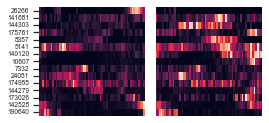

In [128]:
# Non Pyramidal
sns.set(rc={'figure.figsize':(4,2)}, font_scale=0.6, style='ticks')

for idx,row in nonpyr_MN_DF_PPC.iterrows():
    max_act = np.maximum(row['Ca_trial_mean_wL'].max(), row['Ca_trial_mean_bR'].max())
    nonpyr_MN_DF_PPC.at[idx,'Ca_trial_mean_wL'] =  nonpyr_MN_DF_PPC.loc[idx]['Ca_trial_mean_wL']/max_act
    nonpyr_MN_DF_PPC.at[idx,'Ca_trial_mean_bR'] =  nonpyr_MN_DF_PPC.loc[idx]['Ca_trial_mean_bR']/max_act
nonpyr_MN_DF_PPC.sort_values(by=['select_idx_MI'], inplace=True)


nonpyr_MN_left = nonpyr_MN_DF_PPC[nonpyr_MN_DF_PPC.select_idx_MI < -0.05]
nonpyr_MN_left.sort_values(by = ['choiceMI_max_idx'], inplace=True)
wL_l = np.stack(nonpyr_MN_left.Ca_trial_mean_wL.values)
bR_l = np.stack(nonpyr_MN_left.Ca_trial_mean_bR.values)
print("left selective, ids %i to %i" % (nonpyr_MN_left.skeleton_id.values[0], nonpyr_MN_left.skeleton_id.values[-1]))

nonpyr_MN_right = nonpyr_MN_DF_PPC[nonpyr_MN_DF_PPC.select_idx_MI > 0.05]
nonpyr_MN_right.sort_values(by = ['choiceMI_max_idx'], inplace=True)
wL_r = np.stack(nonpyr_MN_right.Ca_trial_mean_wL.values)
bR_r = np.stack(nonpyr_MN_right.Ca_trial_mean_bR.values)
print("right selective, ids %i to %i" % (nonpyr_MN_right.skeleton_id.values[0], nonpyr_MN_right.skeleton_id.values[-1]))

nonpyr_MN_non = nonpyr_MN_DF_PPC[np.abs(nonpyr_MN_DF_PPC.select_idx_MI) <= 0.05]
nonpyr_MN_non.sort_values(by = ['choiceMI_max_idx'], inplace=True)
wL_non = np.stack(nonpyr_MN_non.Ca_trial_mean_wL.values)
bR_non = np.stack(nonpyr_MN_non.Ca_trial_mean_bR.values)

print("non selective, ids %i to %i" % (nonpyr_MN_non.skeleton_id.values[0], nonpyr_MN_non.skeleton_id.values[-1]))

wL_all = np.concatenate((wL_l, wL_r, wL_non))
bR_all = np.concatenate((bR_l, bR_r, bR_non))
ids_all = np.concatenate((nonpyr_MN_left.skeleton_id.values, nonpyr_MN_right.skeleton_id.values,nonpyr_MN_non.skeleton_id.values))
ids_all = [int(i) for i in ids_all]

plt.subplots_adjust(wspace=0.1, hspace = 0.5)

plt.subplot(1,2,1)
l = sns.heatmap(wL_all,cbar=False)
l.set_yticks(np.arange(len(ids_all))+0.5)
l.set_yticklabels(ids_all, rotation=0)
l.set_xticks([])

plt.subplot(1,2,2)
r = sns.heatmap(bR_all,cbar=False)
r.set_yticks([])
r.set_xticks([])
plt.savefig(figsDir+'nonpyr_activity_heatmap.pdf',bbox_inches='tight')


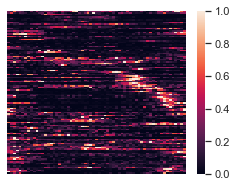

In [127]:
sns.set(rc={'figure.figsize':(4,3)}, font_scale=1, style='ticks')
r = sns.heatmap(bR_all,cbar=True)
r.set_yticks([])
r.set_xticks([])
plt.savefig(figsDir+'colorbar_activity_heatmap.pdf',bbox_inches='tight')